In [ ]:
import pandas as pd
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1xBh3YytbtrOEo2bqMmqe_XncHWtY6aqI/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('df_after_preprocessing2.csv')

df = pd.read_csv('df_after_preprocessing2.csv')

In [ ]:
#read the NYPD dataset
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1NXyZszBLNBkuhVV3fj1SNiTBOSdtkAHD/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('NYPD_Calls_for_Service__Year_to_Date_.csv')

df2 = pd.read_csv('NYPD_Calls_for_Service__Year_to_Date_.csv')


In [ ]:
df= pd.merge(df, df2, on='CAD_EVNT_ID', how='left')

In [ ]:
df.shape

(503449, 37)

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.drop(['Latitude_y','Longitude_y','RADIO_CODE_y'], axis=1, inplace=True)

In [ ]:
df.rename(columns = {'Latitude_x':'Latitude','Longitude_x':'Longitude','RADIO_CODE_x':'RADIO_CODE'}, inplace = True)

In [ ]:
df.columns

Index(['CAD_EVNT_ID', 'NYPD_PCT_CD_x', 'RADIO_CODE', 'ADD_TS_x', 'DISP_TS_x',
       'ARRIVD_TS_x', 'CLOSNG_TS_x', 'Latitude', 'Longitude',
       'INCIDENT_DATE_TIME', 'PATRL_BORO_NM_PATROL BORO BKLYN NORTH',
       'PATRL_BORO_NM_PATROL BORO BKLYN SOUTH',
       'PATRL_BORO_NM_PATROL BORO BRONX',
       'PATRL_BORO_NM_PATROL BORO MAN NORTH',
       'PATRL_BORO_NM_PATROL BORO MAN SOUTH',
       'PATRL_BORO_NM_PATROL BORO QUEENS NORTH',
       'PATRL_BORO_NM_PATROL BORO QUEENS SOUTH',
       'PATRL_BORO_NM_PATROL BORO STATEN ISLAND', 'CIP_JOBS_Critical',
       'CIP_JOBS_Non CIP', 'CIP_JOBS_Non Critical', 'CIP_JOBS_Serious',
       'OBJECTID', 'CREATE_DATE', 'INCIDENT_DATE', 'INCIDENT_TIME',
       'NYPD_PCT_CD_y', 'BORO_NM', 'PATRL_BORO_NM', 'GEO_CD_X', 'GEO_CD_Y',
       'TYP_DESC', 'CIP_JOBS', 'ADD_TS_y', 'DISP_TS_y', 'ARRIVD_TS_y',
       'CLOSNG_TS_y'],
      dtype='object')

In [ ]:
pd.set_option('max_rows', 99999)

In [ ]:
df['RADIO_CODE'].value_counts()

53D     134143
20R      81883
22Q2     67759
50G2     67463
29H1     59831
24Q2     42228
29Q1     33654
10S2      8175
39T1      7787
33         526
Name: RADIO_CODE, dtype: int64

In [ ]:
radio=input('Enter Radio Code: ')
df_radio = df[df['RADIO_CODE']==(radio)]

Enter Radio Code: 53D


In [ ]:
#sampling code- taking only lat and lon columns
x = df_radio[['CAD_EVNT_ID','Latitude','Longitude','BORO_NM']]
x

,CAD_EVNT_ID,Latitude,Longitude,BORO_NM
1,79375430,40.625626,-73.915499,BROOKLYN
9,77586610,40.635211,-74.004491,BROOKLYN
20,75165013,40.850830,-73.915220,BRONX
22,76617294,40.816955,-73.942609,MANHATTAN
25,76304788,40.769033,-73.826239,QUEENS
...,...,...,...,...
503429,78219015,40.718992,-73.989352,MANHATTAN
503436,75852279,40.782077,-73.980835,MANHATTAN
503441,74185299,40.815765,-73.885857,BRONX
503443,74352576,40.702188,-73.917811,BROOKLYN


In [ ]:
borough_count = x.groupby('BORO_NM').agg('count').reset_index()

In [ ]:
maxi=list(borough_count[max(borough_count['CAD_EVNT_ID'])==borough_count['CAD_EVNT_ID']]['BORO_NM'])[0]
counti=list(borough_count[max(borough_count['CAD_EVNT_ID'])==borough_count['CAD_EVNT_ID']]['CAD_EVNT_ID'])[0]
mini=list(borough_count[min(borough_count['CAD_EVNT_ID'])==borough_count['CAD_EVNT_ID']]['BORO_NM'])[0]
print(maxi)
print(mini)
print(counti)

BROOKLYN
STATEN ISLAND
38884


In [ ]:
borough_count

,BORO_NM,CAD_EVNT_ID,Latitude,Longitude
0,BRONX,34671,34671,34671
1,BROOKLYN,38884,38884,38884
2,MANHATTAN,25922,25922,25922
3,QUEENS,29344,29344,29344
4,STATEN ISLAND,5322,5322,5322


In [ ]:
round(int(borough_count[borough_count['BORO_NM']==maxi]['CAD_EVNT_ID'])/counti*100)
round(int(borough_count[borough_count['BORO_NM']==mini]['CAD_EVNT_ID'])/counti*100)

4

In [ ]:
counti=x.shape[0]

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 9.3 MB/s 
     |████████████████████████████████| 6.3 MB 42.4 MB/s 
     |████████████████████████████████| 16.7 MB 31.6 MB/s 


In [ ]:
import geopandas as gpd
from shapely import wkt
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
nyc.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

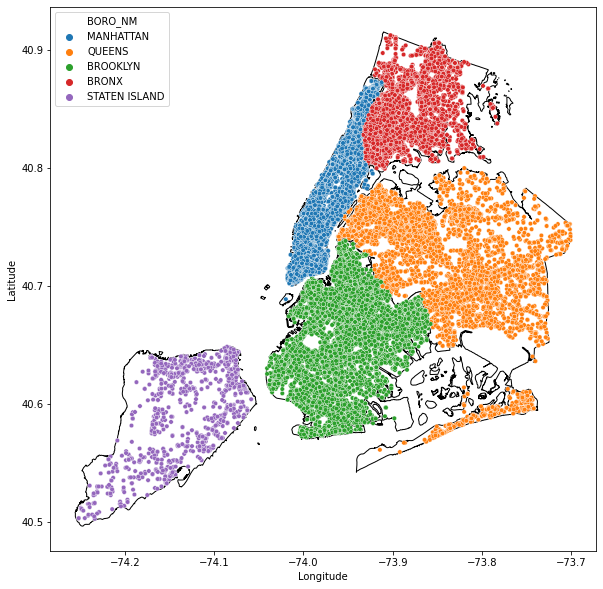

In [ ]:
df_wm = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(1,1, figsize=(10,10))
base = df_wm.plot(color='white', edgecolor='black', ax=ax)
sns.scatterplot(x='Longitude', y='Latitude', hue='BORO_NM',s=20, data=x,)
plt.show()

In [ ]:
#Get a count by borough
borough_count = x.groupby('BORO_NM').agg('count').reset_index()
#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x='BORO_NM', y='CAD_EVNT_ID', data=borough_count, ax=ax1)
ax1.set_title('Number of Crimes by Borough', fontsize=15)
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

NameError: ignored

In [ ]:
count=borough_count[['BORO_NM','CAD_EVNT_ID']]
max_borough=list(borough_count[max(borough_count['CAD_EVNT_ID'])==borough_count['CAD_EVNT_ID']]['BORO_NM'])[0]
max_count=list(borough_count[max(borough_count['CAD_EVNT_ID'])==borough_count['CAD_EVNT_ID']]['CAD_EVNT_ID'])[0]
min_borough=list(borough_count[min(borough_count['CAD_EVNT_ID'])==borough_count['CAD_EVNT_ID']]['BORO_NM'])[0]

In [ ]:
print(max_count)

38884


In [ ]:
count

0    34671
1    38884
2    25922
3    29344
4     5322
Name: CAD_EVNT_ID, dtype: int64

In [ ]:
nyc

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [ ]:
nyc.rename(columns={'BoroName':'BORO_NM'}, inplace=True)
for i in nyc.index:
    nyc.at[i, "BORO_NM"] = nyc.at[i, "BORO_NM"].upper()
bc_geo = nyc.merge(borough_count, on='BORO_NM')

In [ ]:
nyc

,BoroCode,BORO_NM,Shape_Leng,Shape_Area,geometry
0,5,STATEN ISLAND,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,QUEENS,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,BROOKLYN,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,MANHATTAN,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,BRONX,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [ ]:
bc_geo

,BoroCode,BORO_NM,Shape_Leng,Shape_Area,geometry,CAD_EVNT_ID,Latitude,Longitude
0,5,STATEN ISLAND,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1418,1418,1418
1,4,QUEENS,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",11538,11538,11538
2,3,BROOKLYN,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",15067,15067,15067
3,1,MANHATTAN,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",29805,29805,29805
4,2,BRONX,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",9635,9635,9635


(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

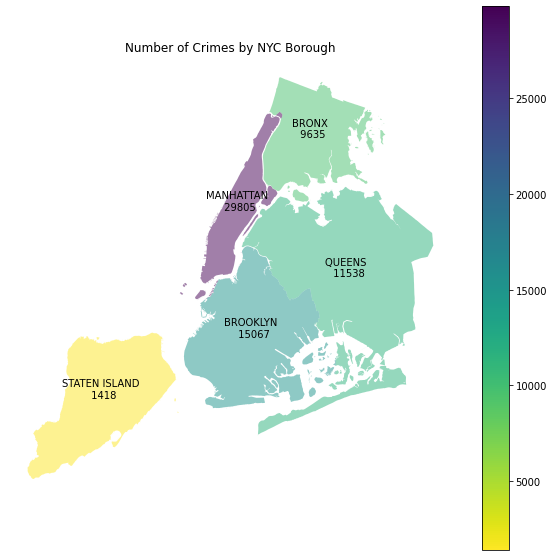

In [ ]:
#Plot the count by borough into a map
fig,ax = plt.subplots(1,1, figsize=(10,10))
bc_geo.plot(column='CAD_EVNT_ID', cmap='viridis_r', alpha=.5, ax=ax, legend=True)
bc_geo.apply(lambda x: ax.annotate(s='%s \n %.f'%(x.BORO_NM,x.CAD_EVNT_ID ), color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
plt.title("Number of Crimes by NYC Borough")
plt.axis('off')

(905464.7390380859, 1075092.8783935546, 112485.76063504723, 280480.4142594267)

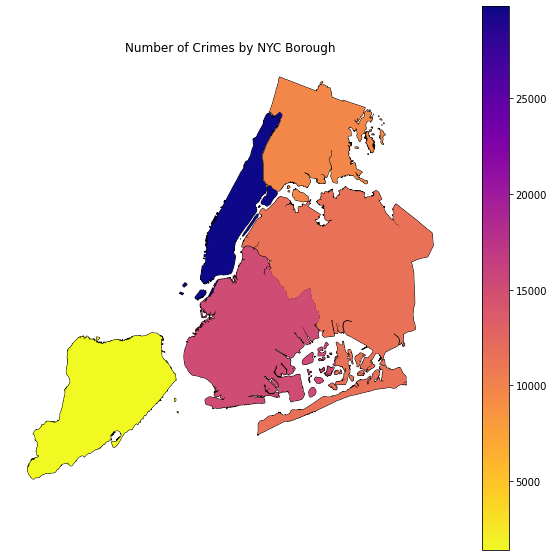

In [ ]:
#Lets take a look at the count by neighborhood
fig,ax = plt.subplots(1,1, figsize=(10,10))

base = nyc.plot(color='white', edgecolor='black', ax=ax)

bc_geo.plot(column='CAD_EVNT_ID', cmap='plasma_r', ax=base, legend=True)

plt.title("Number of Crimes by NYC Borough")

plt.axis('off')